In [8]:
import numpy as np
import pandas as pd

In [10]:
dataset = pd.read_csv(r"Downloads\bikebuyer1.csv")

In [11]:
dataset.head()

,ID,Marital Status,Gender,Yearly Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Bike Buyer
0,22711.0,Single,Male,30000,0.0,Partial College,Clerical,No,1,1.0,Europe,33,Yes
1,13555.0,Married,Female,40000,0.0,Graduate Degree,Clerical,Yes,0,1.0,Europe,37,Yes
2,NaN,Married,Male,160000,5.0,Partial College,Professional,No,3,2.0,Europe,55,No
3,2.0,Single,Male,160000,0.0,Graduate Degree,Management,Yes,2,5.0,Pacific,47,No
4,25410.0,NaN,Female,70000,2.0,Bachelors,Skilled Manual,No,1,1.0,North America,38,Yes


In [12]:
dataset.isnull().any()

ID                   True
Marital Status       True
Gender               True
Yearly Income       False
Children             True
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance     True
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [13]:
dataset['Marital Status'].fillna(dataset['Marital Status'].mode()[0], inplace =True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace =True)
dataset['Children'].fillna(dataset['Children'].median(), inplace =True)
dataset['Commute Distance'].fillna(dataset['Commute Distance'].median(), inplace =True) 


In [14]:
dataset.isnull().any()

ID                   True
Marital Status      False
Gender              False
Yearly Income       False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Bike Buyer          False
dtype: bool

In [15]:
dataset.drop(['ID','Education','Home Owner'], axis = 1,inplace = True)

In [16]:
dataset

,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,Single,Male,30000,0.0,Clerical,1,1.0,Europe,33,Yes
1,Married,Female,40000,0.0,Clerical,0,1.0,Europe,37,Yes
2,Married,Male,160000,5.0,Professional,3,2.0,Europe,55,No
3,Single,Male,160000,0.0,Management,2,5.0,Pacific,47,No
4,Married,Female,70000,2.0,Skilled Manual,1,1.0,North America,38,Yes
...,...,...,...,...,...,...,...,...,...,...
6992,Married,Male,100000,4.0,Professional,3,1.0,Europe,52,No
6993,Married,Female,130000,4.0,Professional,4,2.0,Europe,52,No
6994,Married,Female,160000,5.0,Management,2,1.0,Europe,53,No
6995,Single,Female,120000,5.0,Professional,3,1.0,Europe,54,No


In [17]:
dataset['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [18]:
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
dataset['Occupation'].unique()

array(['Clerical', 'Professional', 'Management', 'Skilled Manual',
       'Manual'], dtype=object)

In [20]:
dataset['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

In [21]:
dataset['Bike Buyer'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dataset['Marital Status']=le.fit_transform(dataset['Marital Status'])
dataset['Gender']=le.fit_transform(dataset['Gender'])
dataset['Occupation']=le.fit_transform(dataset['Occupation'])
dataset['Region']=le.fit_transform(dataset['Region'])
dataset['Bike Buyer']=le.fit_transform(dataset['Bike Buyer'])
dataset.head()



,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,1,1,30000,0.0,0,1,1.0,0,33,1
1,0,0,40000,0.0,0,0,1.0,0,37,1
2,0,1,160000,5.0,3,3,2.0,0,55,0
3,1,1,160000,0.0,1,2,5.0,2,47,0
4,0,0,70000,2.0,4,1,1.0,1,38,1


In [23]:
x = dataset.iloc[:,0:9].values
y = dataset.iloc[:,9:10].values

In [24]:
x.shape

(6997, 9)

In [25]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
z = one.fit_transform(x[:,4:5]).toarray()
t =  one.fit_transform(x[:,7:8]).toarray()
x = np.delete(x,[4,7],axis=1)
x = np.concatenate((t,z,x), axis=1)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

In [26]:
x.shape

(6997, 15)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
drc = DecisionTreeClassifier (criterion = 'entropy',random_state = 0)
drc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [30]:
y_pred  = drc.predict(x_test)

In [31]:
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8164285714285714

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [35]:
cm

array([[1060,  144],
       [ 113,   83]], dtype=int64)

In [36]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)#false predict rate true predict rate

In [37]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr,tpr,'b',label = 'auc = %0.2f'%roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')


Text(0.5, 0, 'fpr')

In [38]:
dataset.head(1)

,Marital Status,Gender,Yearly Income,Children,Occupation,Cars,Commute Distance,Region,Age,Bike Buyer
0,1,1,30000,0.0,0,1,1.0,0,33,1


In [39]:
y=drc.predict(sc.transform([[0,1,0,1,0,0,0,0,0,1,100000,4,8,25,32]]))

In [40]:
y

array([0])

In [41]:
from sklearn.ensemble import RandomForestClassifier
rrc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [42]:
rrc.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
y_pred1=rrc.predict(x_test)

In [44]:
y_pred1

array([1, 0, 0, ..., 1, 0, 0])

In [45]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.845

In [47]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred1)

In [48]:
cm1

array([[1128,   76],
       [ 141,   55]], dtype=int64)

In [49]:
import sklearn.metrics as metrics
fpr1,tpr1,threshold=metrics.roc_curve(y_test,y_pred1)
roc_auc1=metrics.auc(fpr1,tpr1)

Text(0.5, 0, 'fpr')

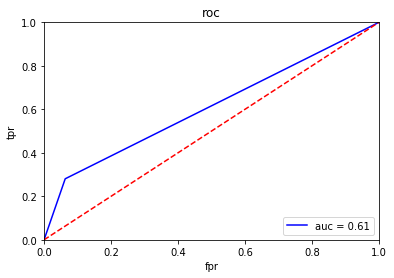

In [50]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr1,tpr1,'b',label = 'auc = %0.2f'%roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')#area underscore curve just like that we plotted no use
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')


In [51]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()#converting y gto prohability
log.fit(x_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_pred2=log.predict(x_test)

In [53]:
y_pred2#as 0 are more so zeroes

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
cm2=confusion_matrix(y_test,y_pred2)

In [56]:
cm2

array([[1204,    0],
       [ 195,    1]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred2)

0.8607142857142858

In [58]:
fpr3,tpr3,threshold=metrics.roc_curve(y_test,y_pred2)
roc_auc3=metrics.auc(fpr3,tpr3)

Text(0.5, 0, 'fpr')

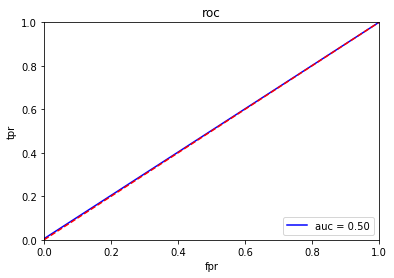

In [60]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr3,tpr3,'b',label = 'auc = %0.2f'%roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')#area underscore curve just like that we plotted no use
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')#worst model true as false and false as true it gave

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")#distance formula can pe eucledian
knn.fit(x_train,y_train)
#below p=2 is in formula how many leaf nodes it should have we give as 30
#defaulty algo is taken as auto


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
ypred3=knn.predict(x_test)

In [63]:
ypred3

array([0, 0, 0, ..., 0, 1, 0])

In [64]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [65]:
cm3=confusion_matrix(y_test,ypred3)

In [66]:
cm3

array([[1161,   43],
       [ 162,   34]], dtype=int64)

In [68]:
accuracy_score(y_test,ypred3)

0.8535714285714285

In [69]:
fpr4,tpr4,threshold=metrics.roc_curve(y_test,ypred3)
roc_auc4=metrics.auc(fpr4,tpr4)

Text(0.5, 0, 'fpr')

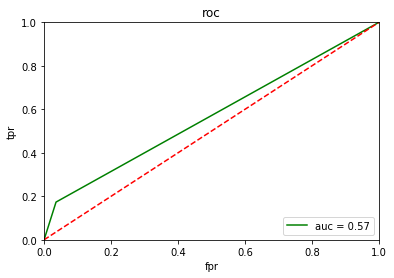

In [70]:
import matplotlib.pyplot as plt
plt.title("roc")
plt.plot(fpr4,tpr4,'g',label = 'auc = %0.2f'%roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')#area underscore curve just like that we plotted no use
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('tpr')
plt.xlabel('fpr')#this is also worst model